<a href="https://www.kaggle.com/code/benipuri001/smartretain?scriptVersionId=239519817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ✅ Step 1:  Import Libraries
Importing essential Python libraries for data handling and preprocessing.

In [2]:
# Step 1:Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')


# # 📂 Data Collection and Preprocessing
-The dataset was sourced from Kaggle's Telco Customer Churn dataset, simulating CRM and transaction data. After loading, data cleaning involved handling missing values, standardizing formats, and encoding categorical features for model readiness. Validation was done through summary statistics to ensure integrity.


# ✅ Step 2: Loading Dataset
Load the Telco Customer Churn dataset into  pandas DataFrame.

In [3]:
# Step 2: Load dataset
df = pd.read_csv('/kaggle/input/cleaned-one/SmartRetain_CleanedData.csv')


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# ✅ Step 3:  Basic Info & Shape
Check size, column data types, and missing/null values.

In [4]:
# Step 3:Dataset overview
print("Shape of dataset:", df.shape)
print("\nDataset info:")
print(df.info())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape of dataset: (7043, 21)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

# ✅ Step 4: Clean TotalCharges column

In [5]:
# Step 4: Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


# ✅ Step 5:Drop Unnecessary Column

In [6]:
# Droping customerID as it's irrelevant for prediction.
# Step 5:Drop 'customerID' column
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


# ✅ Step 6: Encode Target Column

In [7]:
# Step 6: Encode target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# ✅ Step 7: Encode Categorical Features

In [8]:
# Step 7: Encode categorical variables
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    # Backup Target Column 'Churn' before encoding
churn_backup = df['Churn'] 

# One-hot encoding for remaining categorical features
df = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)

df['Churn'] = churn_backup



# ✅ Step 8: Split Dataset

In [9]:
# Step 8: Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (5625, 30)
y_train shape: (5625,)


#  Exploratory Data Analysis (EDA)

##  Objective:
- Perform statistical analysis and feature engineering.
- Identify key factors influencing customer churn using visual and statistical analysis.


In [10]:
# Backup unencoded version for EDA
df_vis = pd.read_csv('/kaggle/input/cleaned-one/SmartRetain_CleanedData.csv')


In [11]:
# Step 1: Descriptive Statistics
#Understanding the distribution of numerical variables such as tenure, monthly charges, and total charges.
# Basic statistics
df.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


# Step 2: Churn Rate Analysis
# Calculate and visualize how many customers have churned.


Churn Rate (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


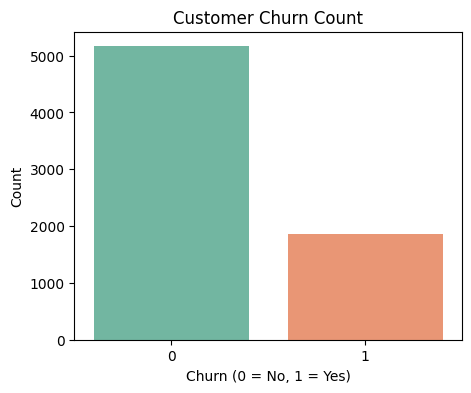

In [12]:
# Churn rate (%)
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

# Plot churn count
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Count")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


# ✅ Step 3: Univariate Analysis (Tenure & Monthly Charges)

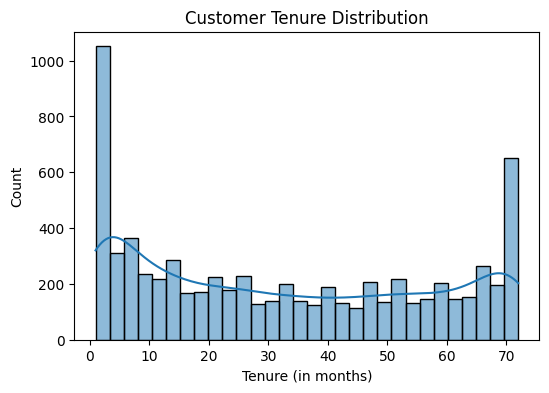

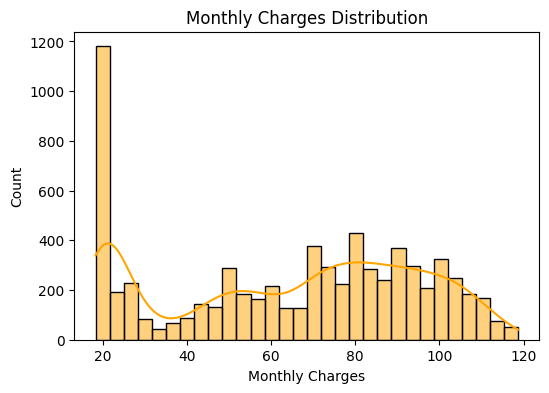

In [13]:
# Step 3: Univariate Analysis
# Visualize the distribution of key numeric columns like tenure and monthly charges.

# Tenure Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (in months)")
plt.show()

# Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='orange')
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.show()


# ✅ Step 4: Bivariate Analysis – Contract Type vs Churn

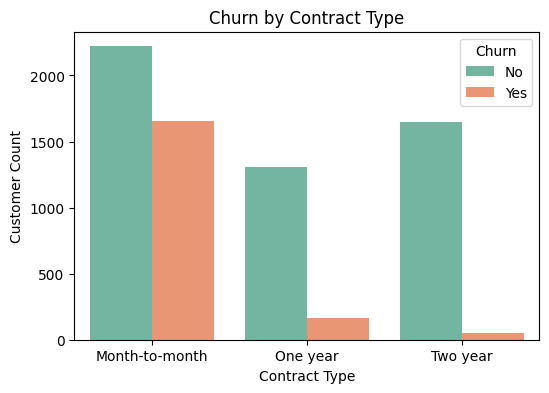

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_vis, x='Contract', hue='Churn', palette='Set2')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(title='Churn')
plt.show()


# ✅ Step 5: Churn vs Payment Method

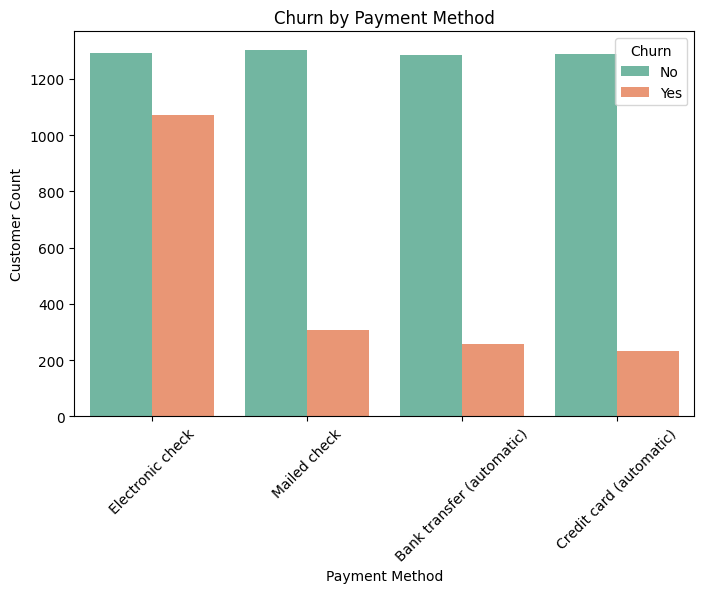

In [15]:
# Step 5: Churn vs Payment Method
# Check which payment methods are most associated with churn.

plt.figure(figsize=(8,5))
sns.countplot(data=df_vis, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.legend(title='Churn')
plt.show()


# ✅ Step 6: Boxplot – Monthly Charges vs Churn

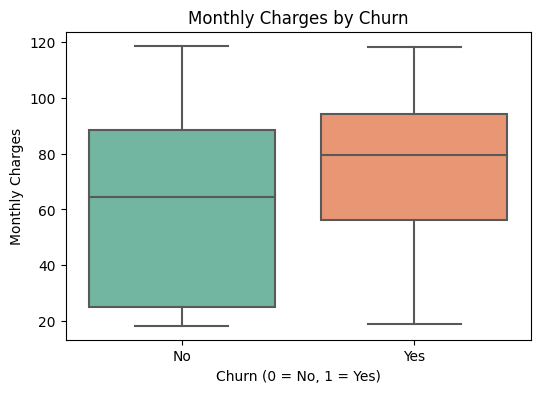

In [16]:
# Step 6: Monthly Charges vs Churn (Boxplot)
# Compare average monthly charges between churned and retained customers.

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_vis, palette='Set2')
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


# ✅ Step 7: Correlation Heatmap



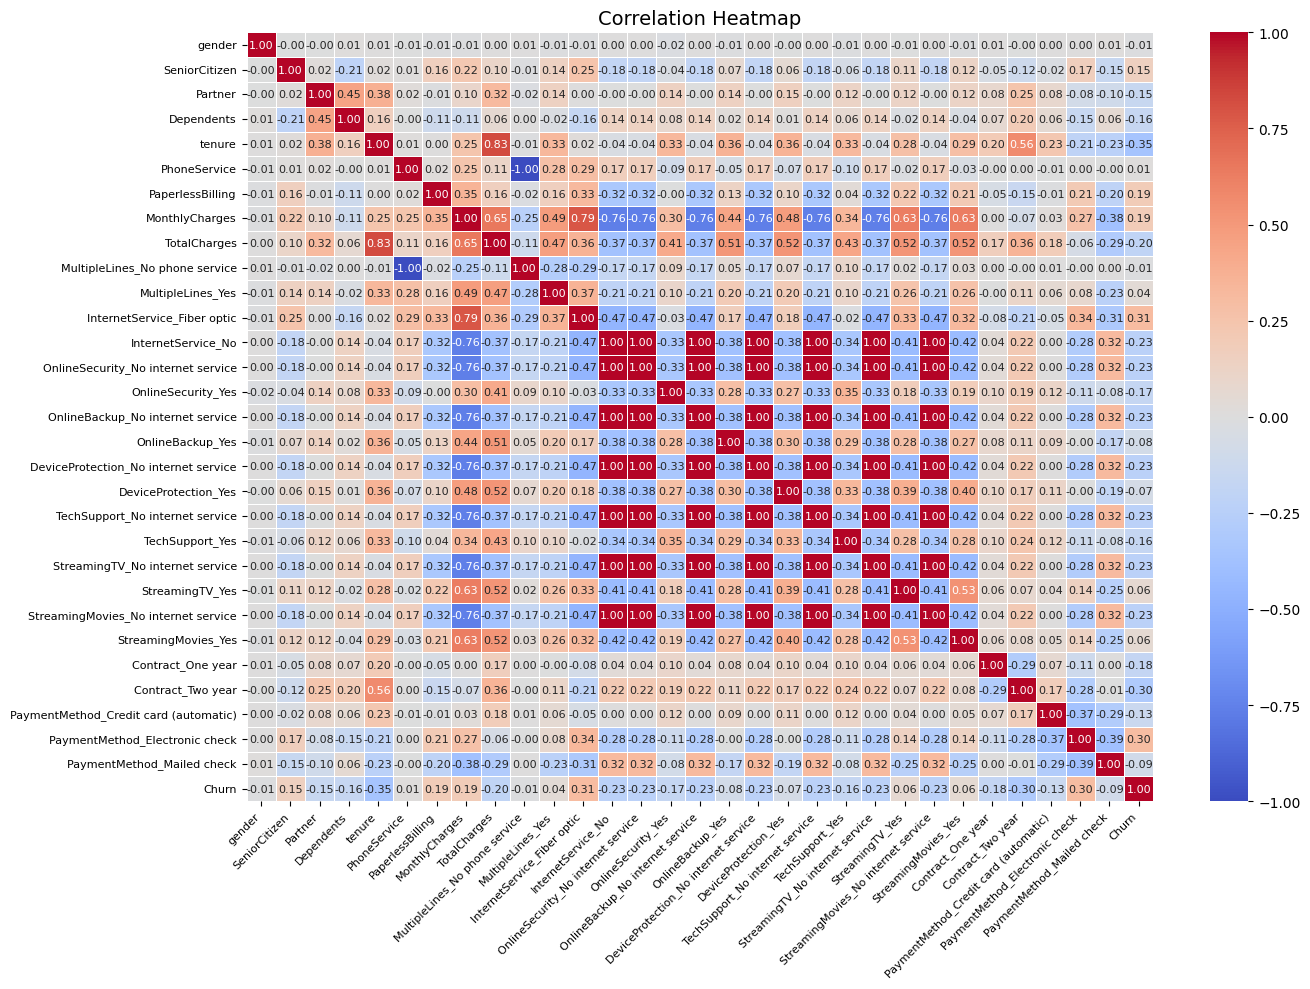

In [17]:
# Step 7: Correlation Heatmap
# Visualize the relationship between numerical variables and churn.

plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



# Model Selection & Training

## Objective:
- Train multiple machine learning models (Logistic Regression, Random Forest, XGBoost).
- Evaluate and compare their performance.
- Tune hyperparameters to optimize results.


# ✅ Step 1: Import Required Libraries

In [18]:
## Step 1: Import Required Libraries
#Import machine learning models and evaluation metrics.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV



# ✅ Step 2: Prepare Features and Target

In [19]:
## Step 2: Prepare Features and Target
# Define input features (X) and output labels (y), and split into train and test sets.

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (5625, 30)
y_train shape: (5625,)


# ✅ Step 3: Train Logistic Regression

In [20]:
## Step 3: Train Logistic Regression
#Train a logistic regression model and evaluate using classification report.

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# ✅ Step 4: Train Random Forest Classifier

In [21]:
## Step 4: Train Random Forest Classifier
# Train a Random Forest model and evaluate performance.

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



# ✅ Step 5: Train XGBoost Classifier

In [22]:
## Step 5: Train XGBoost Classifier
# Train an XGBoost model, knowing for strong performance in churn prediction.

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Results:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



# ✅ Step 6: Accuracy Comparison

In [23]:
## Step 6: Accuracy Comparison
# Compare accuracy of all three models to identify best performer.

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.7860696517412935
Random Forest Accuracy: 0.7882018479033405
XGBoost Accuracy: 0.7633262260127932


# 🌲 Step 7: Hyperparameter Tuning - Random Forest

## 🎯 Objective:
Use GridSearchCV to find the best combination of hyperparameters for the Random Forest model, which improves its accuracy and robustness.

## 📦 Parameters to Tune:
- n_estimators: Number of trees in the forest
- max_depth: Maximum depth of the tree
- min_samples_split: Minimum number of samples required to split an internal node
- min_samples_leaf: Minimum number of samples required at each leaf node

## 🔍 Method:
- Use GridSearchCV with 3-fold cross-validation.
- Optimize for highest accuracy.


In [24]:
# Import required library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [5, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [26]:

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,            # 3-fold cross-validation
    n_jobs=-1,       # utilize all available cores
    verbose=1,
    scoring='accuracy'
)

In [27]:
# Fit on training data
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [28]:
# Best parameters after tuning
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
# Best estimator model
best_rf = grid_rf.best_estimator_


In [30]:
# Predictions with best model
y_pred_rf_best = best_rf.predict(X_test)

In [31]:

# Evaluation

print("Random Forest After Tuning:")
print(classification_report(y_test, y_pred_rf_best))
print("Accuracy After Tuning:", accuracy_score(y_test, y_pred_rf_best))

Random Forest After Tuning:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy After Tuning: 0.7974413646055437


# Step 8: Hyperparameter Tuning - XGBoost

##  Objective:
Use GridSearchCV to find the best combination of hyperparameters for the XGBoost model, maximizing accuracy and improving churn prediction.

## 📦 Parameters to Tune:
- n_estimators: Number of boosting rounds.
- max_depth: Maximum tree depth for base learners.
- learning_rate: Step size shrinkage to prevent overfitting.
- subsample: Percentage of samples used per tree.

## 🔍 Method:
- Use GridSearchCV with 3-fold cross-validation.
- Optimize for highest accuracy.


In [32]:
# Import XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [33]:
# Define parameter grid for XGBoost

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

In [34]:
# Initialize GridSearchCV

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

In [ ]:
# Fit on training data

grid_xgb.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# Best parameters after tuning

print("Best Parameters for XGBoost:", grid_xgb.best_params_)

In [ ]:
# Best estimator model

best_xgb = grid_xgb.best_estimator_


In [ ]:
# Predictions with best XGBoost model

y_pred_xgb_best = best_xgb.predict(X_test)


In [ ]:
# Evaluation

from sklearn.metrics import classification_report, accuracy_score


In [ ]:

print("XGBoost After Tuning:")
print(classification_report(y_test, y_pred_xgb_best))
print("Accuracy After Tuning:", accuracy_score(y_test, y_pred_xgb_best))

## Churn Dashboard – Python Visualizations

This section visualizes key insights about customer churn using various Python plots.  
It helps understand how churn relates to contract types, gender, and customer tenure.


## 1. Overall Churn Distribution

This plot shows the overall distribution of churned vs non-churned customers.  
It helps us understand the churn rate in the dataset.


In [ ]:
# Countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

# Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)


## 2. Churn by Contract Type

Here, we explore how churn varies across different types of contracts.  
Month-to-month contracts generally show higher churn compared to longer-term plans.


In [ ]:
def get_contract_type(row):
    if row['Contract_One year'] == 1:
        return 'One year'
    elif row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

df['contract'] = df.apply(get_contract_type, axis=1)


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='contract', hue='Churn', palette='muted')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()




## 3. Churn by Gender

This plot compares churn behavior between male and female customers.  
It helps identify if there's any gender-based trend in customer retention.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette='pastel')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()


## 4. Churn by Customer Tenure

This histogram shows churn frequency based on how long a customer has been with the company.  
Lower tenure generally correlates with higher churn, indicating early-stage dissatisfaction.


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title("Churn Distribution Across Tenure")
plt.xlabel("Tenure (in months)")
plt.ylabel("Number of Customers")
plt.show()


##  Retention Strategy Recommendation

### ✅ Step 1: Segment Churned Customers

We first filter out the churned customers (`Churn == 1`) and then segment them based on important categories like `tenure`, `MonthlyCharges`, and `Contract`.



In [ ]:
# Filter churned customers
churned = df[df['Churn'] == 1]

# Segment based on tenure
churned['tenure_group'] = pd.cut(churned['tenure'], bins=[0, 6, 12, 72], labels=["<6m", "6-12m", ">1y"])

# Segment based on MonthlyCharges
churned['charges_group'] = pd.cut(churned['MonthlyCharges'], bins=[0, 50, 80, 200], labels=["Low", "Medium", "High"])

# ✅ Step 2: Analyze Patterns in Churned Segments
Now, we analyze the average charges or frequency of churn in each segment to identify why they might be leaving.

In [ ]:
def extract_internet_service(row):
    if row['InternetService_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['InternetService_No'] == 1:
        return 'No'
    else:
        return 'DSL'  # agar dono 0 hai to DSL hi bacha

# Apply on churned dataframe
churned['InternetService'] = churned.apply(extract_internet_service, axis=1)

# Verify
churned['InternetService'].value_counts()


In [ ]:
# Check average monthly charges by contract type
churned.groupby('contract')['MonthlyCharges'].mean()

# Count of churned customers by internet service
churned['InternetService'].value_counts()

# Count by tenure group
churned['tenure_group'].value_counts()


# ✅ Suggested Retention Strategy Based on This:
## 💡 Retention Insights from Tenure Group

1. **New Users (<6 months)**  
    Improve onboarding experience  
    Assign welcome call, support walk-through, and early reward

2. **Long-Term Users (>1 year)**  
    Launch loyalty program  
    Offer personalized offers to show value & prevent switching

3. **Mid-Tenure Users (6–12 months)**  
    Less risky, but need proactive engagement through feedback forms, usage insights


In [ ]:
# Step 1: InternetService recreate karna (agar pehle se nahi kiya)
def extract_internet_service(row):
    if row.get('InternetService_Fiber optic', 0) == 1:
        return 'Fiber optic'
    elif row.get('InternetService_No', 0) == 1:
        return 'No'
    else:
        return 'DSL'

churned['InternetService'] = churned.apply(extract_internet_service, axis=1)


In [ ]:
# Step 2: Strategy function define karke apply karo
def recommend_strategy(row):
    if row['contract'] == 'Month-to-month' and row['MonthlyCharges'] > 80:
        return 'Offer yearly plan discount'
    elif row['tenure'] < 6:
        return 'Improve onboarding support'
    elif row['InternetService'] == 'Fiber optic':
        return 'Enhance technical support'
    else:
        return 'General follow-up strategy'

# Step 3: Apply strategy to create the column
churned['RecommendedStrategy'] = churned.apply(recommend_strategy, axis=1)


In [ ]:
churned['RecommendedStrategy'].value_counts()


# Step 6: Visualize Strategy Distribution (Bar Chart)
# 📊 Visualizing Retention Strategy Distribution

To better understand the most common reasons behind churn and which strategy will be the most impactful, we plot the distribution of recommended strategies.


In [ ]:
import matplotlib.pyplot as plt

# Count strategy distribution
strategy_counts = churned['RecommendedStrategy'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
strategy_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Retention Strategy Distribution")
plt.xlabel("Strategy")
plt.ylabel("Number of Churned Customers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##  Export Churned Dataset with Strategies

We now export the enriched churned dataset containing tenure groups, charges group, internet type, and recommended retention strategy. This file can be used in Power BI or for executive reporting.


In [ ]:
churned.to_csv("churned_with_retention_strategies.csv", index=False)
print("File saved: churned_with_retention_strategies.csv")


## 🚀 Model Deployment using Flask

In this section, we deploy the trained churn prediction model using Flask. The application takes user inputs (like tenure, monthly charges, contract type, etc.) and predicts whether the customer is likely to churn.

### 🔧 Step 1: Export Trained Model

We first save the trained model using `joblib`.


In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, "model.pkl")
